In [1]:
 # https://ai.google/tools/datasets/google-facial-expression/
import imageio
import os
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
import time
import numpy as np
import random
import hashlib

In [2]:
def uniqueName(data, extension='jpg'): 
    # requires to be specialized because this is used in loops
    # data is (file, top, bot, left, right)
    base = hashlib.md5(str(data).encode('utf-8')).hexdigest()
    return f"{base}.{extension}"

def raw_align_image(df, row, col):
    keys = [f'Image{col}', f'Top{col}', f'Bot{col}', f'Left{col}',f'Right{col}']
    data = list(map(lambda key: df[key][row], keys))
    data[0] = os.path.basename(data[0])
    data = tuple(data)
    return data[0], uniqueName(data)

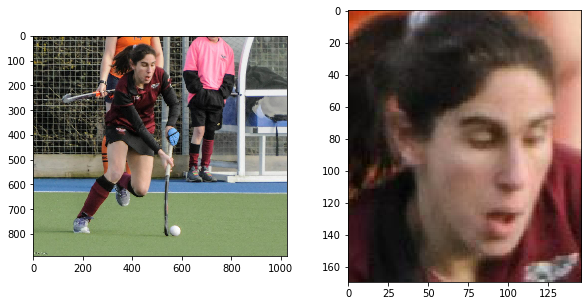

In [4]:
# open an image pair to show aligning
df = pd.read_csv('FEC_dataset/train.csv')
m = len(df)
row = random.randint(0, m)
col = random.choice([1,2,3])

raw, aligned = raw_align_image(df, row, col)

raw = imageio.imread(f'FEC_dataset/images/{raw}')
aligned = imageio.imread(f'FEC_dataset/formatted/{aligned}')

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(raw)
axs[1].imshow(aligned)

Report:
type: TWO_CLASS_TRIPLET
 269701: 1
 291701: 1
 300901: 1
 321601: 1
 4295017797: 1
 4295017896: 1


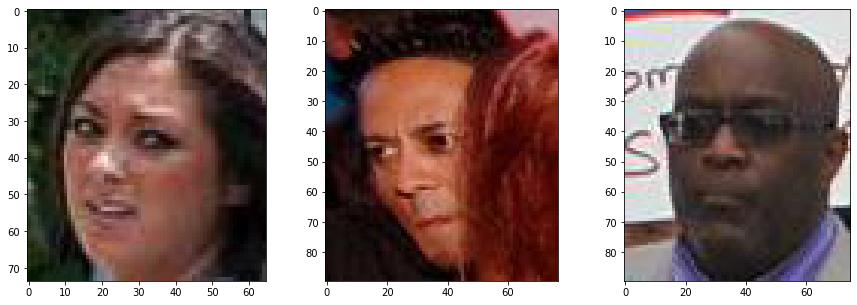

In [9]:
import random
fig, axs = plt.subplots(1,3, figsize=(15,5))
df = pd.read_csv('FEC_dataset/train_formatted.csv')
row = random.randint(0,m)
for col in range(3):
    image = os.path.basename(df[f'Image{col+1}'][row])
    axs[col].imshow(imageio.imread(f'FEC_dataset/formatted/{image}'))

print("Report:")
print('type:', df['Triplet_type'][row])
for i in range(1,7):
    left, right = df[f'Anno{i}_id'][row], df[f'Anno{i}'][row] 
    print(f' {left}: {right}')

In [5]:
df[df.Triplet_type=='ONE_CLASS_TRIPLET'].to_csv('FEC_dataset/two_class.csv')

In [6]:
import statistics as st

images = os.listdir('FEC_dataset/formatted/')

shapes = []
for image in tqdm(images):
    shapes.append(imageio.imread(f'FEC_dataset/formatted/{image}').shape)
shapes = list(zip(*shapes))
print('Mean  Stdev')
for dim in shapes:
    print(st.mean(dim), st.stdev(dim))

KeyboardInterrupt: 

In [ ]:
L = ['Width', 'Height']
for i, dim in enumerate(shapes):
    print(L[i])
    print("--------")
    print("Median", st.median(dim))
    print("Mean  ", st.mean(dim))
    print("Max   ", max(dim))
    print("Min   ", min(dim))
    print()

In [ ]:
# avaerage aspect ratio
ratios = [shapes[0][i]/shapes[1][i] for i in range(len(shapes[0]))]
print("average ratio is", st.mean(ratios))